In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from statsmodels.tsa.arima.model import ARIMA

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
DIR = "/content/drive/MyDrive/ColabNotebooks"
os.chdir(DIR)

In [6]:
df = pd.read_csv("df_filtrado.csv")

In [7]:
df_f = df

In [8]:
df_f['fecha_hecho'] = pd.to_datetime(df_f['fecha_hecho'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [9]:
fecha_inicio = pd.to_datetime("2023-01-01")
fecha_fin = pd.to_datetime("2024-06-30")

# Aplicar el filtro entre estas dos fechas
df_f = df_f[(df_f['fecha_hecho'] >= fecha_inicio) & (df_f['fecha_hecho'] <= fecha_fin)]

In [10]:
map_prioridad = {
    'BAJA PRIORIDAD': 0,
    'ALTA PRIORIDAD': 1
}

# Aplicar el mapeo y agregar una nueva columna llamada 'prioridad_numeric'
df_f['prioridad_numeric'] = df_f['prioridad_atencion'].map(map_prioridad)

<ipython-input-10-743dcac8bfba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['prioridad_numeric'] = df_f['prioridad_atencion'].map(map_prioridad)


In [11]:
# Crear un diccionario para mapear las alcaldías a valores numéricos
map_alcaldia = {
    'IZTAPALAPA': 1,
    'CUAUHTEMOC': 2,
    'GUSTAVO A. MADERO': 3,
    'BENITO JUAREZ': 4,
    'COYOACAN': 5,
    'ALVARO OBREGON': 6,
    'TLALPAN': 7,
    'MIGUEL HIDALGO': 8,
    'VENUSTIANO CARRANZA': 9,
    'IZTACALCO': 10,
    'AZCAPOTZALCO': 11,
    'XOCHIMILCO': 12,
    'TLAHUAC': 13,
    'LA MAGDALENA CONTRERAS': 14,
    'CUAJIMALPA DE MORELOS': 15,
    'MILPA ALTA': 16
}

# Aplicar el mapeo y agregar una nueva columna llamada 'alcaldia_numeric'
df_f['alcaldia_numeric'] = df_f['alcaldia_hecho'].map(map_alcaldia)



<ipython-input-11-baf2b7666c93>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['alcaldia_numeric'] = df_f['alcaldia_hecho'].map(map_alcaldia)


In [12]:
map_zona = {
    'SUR': 1,
    'ORIENTE': 2,
    'NORTE': 3,
    'PONIENTE': 4,
    'CENTRO': 5
}

# Aplicar el mapeo y agregar una nueva columna llamada 'zona_numeric' sin eliminar las demás columnas
df_f['zona_numeric'] = df_f['zona'].map(map_zona)

<ipython-input-12-083c396be942>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['zona_numeric'] = df_f['zona'].map(map_zona)


In [13]:
map_categoria_delito = {
    'DELITO DE BAJO IMPACTO': 1,
    'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA': 2,
    'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA': 3,
    'HECHO NO DELICTIVO': 4,
    'VIOLACIÓN': 5,
    'ROBO A NEGOCIO CON VIOLENCIA': 6,
    'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA': 7,
    'ROBO A REPARTIDOR CON Y SIN VIOLENCIA': 8,
    'HOMICIDIO DOLOSO': 9,
    'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA': 10,
    'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO': 11,
    'ROBO A CASA HABITACIÓN CON VIOLENCIA': 12,
    'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA': 13,
    'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA': 14,
    'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA': 15,
    'SECUESTRO': 16
}

# Aplicar el mapeo y agregar una nueva columna llamada 'categoria_delito_numeric'
df_f['categoria_delito_numeric'] = df_f['categoria_delito'].map(map_categoria_delito)


<ipython-input-13-b51b81d95676>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['categoria_delito_numeric'] = df_f['categoria_delito'].map(map_categoria_delito)


In [14]:
df_f = df_f.drop('indice_normalizado', axis=1)
df_f = df_f.drop('indice_total', axis=1)
df_f = df_f.drop('zona', axis=1)

In [15]:
# modificar los indices
df_f.reset_index(drop=True, inplace=True)

In [16]:
# Paso 1: Identificar clases con menos de 2 instancias
clases_enough_date = df_f['fecha_hecho'].value_counts()
clases_enough_date = clases_enough_date[clases_enough_date < 2].index.tolist()
print("\nClases Raras a Eliminar:", len(clases_enough_date))

# Paso 2: Eliminar las clases raras del DataFrame
df_filtrado = df_f[~df_f['fecha_hecho'].isin(clases_enough_date)]

# Verificar la distribución de clases después del filtrado
print("\nDistribución de Clases Después de Filtrar:")
print(df_filtrado['categoria_delito'].value_counts())


Clases Raras a Eliminar: 0

Distribución de Clases Después de Filtrar:
categoria_delito
DELITO DE BAJO IMPACTO                                     219835
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA         8595
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         6938
HECHO NO DELICTIVO                                           4075
VIOLACIÓN                                                    2211
ROBO A NEGOCIO CON VIOLENCIA                                 1526
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        1026
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                         918
HOMICIDIO DOLOSO                                              610
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       504
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 344
ROBO A CASA HABITACIÓN CON VIOLENCIA                          272
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       205
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA        

In [17]:
# Paso 1: Identificar clases con menos de 2 instancias
clases_enough_fiscalia = df_filtrado['fiscalia'].value_counts()
clases_enough_fiscalia = clases_enough_fiscalia[clases_enough_fiscalia < 2].index.tolist()
print("\nClases Raras a Eliminar:", len(clases_enough_fiscalia))

# Paso 2: Eliminar las clases raras del DataFrame
df_filtrado = df_filtrado[~df_filtrado['fecha_hecho'].isin(clases_enough_fiscalia)]

# Verificar la distribución de clases después del filtrado
print("\nDistribución de Clases Después de Filtrar:")
print(df_filtrado['categoria_delito'].value_counts())


Clases Raras a Eliminar: 2

Distribución de Clases Después de Filtrar:
categoria_delito
DELITO DE BAJO IMPACTO                                     219835
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA         8595
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         6938
HECHO NO DELICTIVO                                           4075
VIOLACIÓN                                                    2211
ROBO A NEGOCIO CON VIOLENCIA                                 1526
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        1026
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                         918
HOMICIDIO DOLOSO                                              610
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       504
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 344
ROBO A CASA HABITACIÓN CON VIOLENCIA                          272
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       205
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA        

In [18]:
# Paso 1: Identificar clases con menos de 2 instancias
clases_enough_agencia = df_filtrado['agencia'].value_counts()
clases_enough_agencia = clases_enough_agencia[clases_enough_agencia < 2].index.tolist()
print("\nClases Raras a Eliminar:", len(clases_enough_agencia))

# Paso 2: Eliminar las clases raras del DataFrame
df_filtrado = df_filtrado[~df_filtrado['fecha_hecho'].isin(clases_enough_agencia)]

# Verificar la distribución de clases después del filtrado
print("\nDistribución de Clases Después de Filtrar:")
print(df_filtrado['categoria_delito'].value_counts())


Clases Raras a Eliminar: 12

Distribución de Clases Después de Filtrar:
categoria_delito
DELITO DE BAJO IMPACTO                                     219835
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA         8595
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         6938
HECHO NO DELICTIVO                                           4075
VIOLACIÓN                                                    2211
ROBO A NEGOCIO CON VIOLENCIA                                 1526
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        1026
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                         918
HOMICIDIO DOLOSO                                              610
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       504
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 344
ROBO A CASA HABITACIÓN CON VIOLENCIA                          272
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       205
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA       

In [19]:
# Paso 1: Identificar clases con menos de 2 instancias
clases_enough_col = df_filtrado['colonia_hecho'].value_counts()
clases_enough_col = clases_enough_col[clases_enough_col < 2].index.tolist()
print("\nClases Raras a Eliminar:", len(clases_enough_col))

# Paso 2: Eliminar las clases raras del DataFrame
df_filtrado = df_filtrado[~df_filtrado['fecha_hecho'].isin(clases_enough_col)]

# Verificar la distribución de clases después del filtrado
print("\nDistribución de Clases Después de Filtrar:")
print(df_filtrado['categoria_delito'].value_counts())


Clases Raras a Eliminar: 25

Distribución de Clases Después de Filtrar:
categoria_delito
DELITO DE BAJO IMPACTO                                     219835
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA         8595
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         6938
HECHO NO DELICTIVO                                           4075
VIOLACIÓN                                                    2211
ROBO A NEGOCIO CON VIOLENCIA                                 1526
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        1026
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                         918
HOMICIDIO DOLOSO                                              610
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       504
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 344
ROBO A CASA HABITACIÓN CON VIOLENCIA                          272
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       205
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA       

In [20]:
# Paso 1: Identificar clases con menos de 2 instancias
clases_enough = df_filtrado['colonia_catalogo'].value_counts()
clases_enough = clases_enough[clases_enough < 2].index.tolist()
print("\nClases Raras a Eliminar:", len(clases_enough))

# Paso 2: Eliminar las clases raras del DataFrame
df_filtrado = df_filtrado[~df_filtrado['fecha_hecho'].isin(clases_enough)]

# Verificar la distribución de clases después del filtrado
print("\nDistribución de Clases Después de Filtrar:")
print(df_filtrado['categoria_delito'].value_counts())


Clases Raras a Eliminar: 7

Distribución de Clases Después de Filtrar:
categoria_delito
DELITO DE BAJO IMPACTO                                     219835
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA         8595
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         6938
HECHO NO DELICTIVO                                           4075
VIOLACIÓN                                                    2211
ROBO A NEGOCIO CON VIOLENCIA                                 1526
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        1026
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                         918
HOMICIDIO DOLOSO                                              610
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       504
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 344
ROBO A CASA HABITACIÓN CON VIOLENCIA                          272
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       205
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA        

In [21]:
# Paso 1: Identificar clases con menos de 2 instancias
clases_enough = df_filtrado['delito'].value_counts()
clases_enough = clases_enough[clases_enough < 2].index.tolist()
print("\nClases Raras a Eliminar:", len(clases_enough))

# Paso 2: Eliminar las clases raras del DataFrame
df_filtrado = df_filtrado[~df_filtrado['fecha_hecho'].isin(clases_enough)]

# Verificar la distribución de clases después del filtrado
print("\nDistribución de Clases Después de Filtrar:")
print(df_filtrado['categoria_delito'].value_counts())


Clases Raras a Eliminar: 19

Distribución de Clases Después de Filtrar:
categoria_delito
DELITO DE BAJO IMPACTO                                     219835
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA         8595
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         6938
HECHO NO DELICTIVO                                           4075
VIOLACIÓN                                                    2211
ROBO A NEGOCIO CON VIOLENCIA                                 1526
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        1026
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                         918
HOMICIDIO DOLOSO                                              610
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       504
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 344
ROBO A CASA HABITACIÓN CON VIOLENCIA                          272
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       205
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA       

In [22]:
# Paso 1: Identificar clases con menos de 2 instancias
clases_enough = df_filtrado['unidad_investigacion'].value_counts()
clases_enough = clases_enough[clases_enough < 2].index.tolist()
print("\nClases Raras a Eliminar:", len(clases_enough))

# Paso 2: Eliminar las clases raras del DataFrame
df_filtrado = df_filtrado[~df_filtrado['fecha_hecho'].isin(clases_enough)]

# Verificar la distribución de clases después del filtrado
print("\nDistribución de Clases Después de Filtrar:")
print(df_filtrado['categoria_delito'].value_counts())


Clases Raras a Eliminar: 4

Distribución de Clases Después de Filtrar:
categoria_delito
DELITO DE BAJO IMPACTO                                     219835
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA         8595
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         6938
HECHO NO DELICTIVO                                           4075
VIOLACIÓN                                                    2211
ROBO A NEGOCIO CON VIOLENCIA                                 1526
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        1026
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                         918
HOMICIDIO DOLOSO                                              610
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       504
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 344
ROBO A CASA HABITACIÓN CON VIOLENCIA                          272
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       205
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA        

In [23]:
df_filtrado = df_filtrado.drop('fecha_inicio', axis=1)
df_filtrado = df_filtrado.drop('categoria_delito', axis=1)

In [24]:
df.head()

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,delito,categoria_delito,fiscalia,...,alcaldia_catalogo,municipio_hecho,latitud,longitud,prioridad_atencion,zona,rango_hora_dia,peso_prioridad,indice_total,indice_normalizado
0,2016,Enero,2016-01-01,00:00:00,2016.0,Enero,2016-01-01 01:45:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,...,Iztapalapa,CDMX,19.31861,-99.07572,BAJA PRIORIDAD,ORIENTE,MADRUGADA,1,359372,97.801606
1,2016,Enero,2016-01-01,00:00:00,2016.0,Enero,2016-01-01 01:30:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN COYOACÁN,...,Coyoacán,CDMX,19.31267,-99.11181,BAJA PRIORIDAD,SUR,MADRUGADA,1,367450,100.000000
2,2016,Enero,2016-01-01,00:00:00,2016.0,Enero,2016-01-01 02:00:00,DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,...,Azcapotzalco,CDMX,19.47936,-99.17994,BAJA PRIORIDAD,PONIENTE,MADRUGADA,1,325890,88.689618
3,2016,Enero,2016-01-01,00:00:00,2016.0,Enero,2016-01-01 06:30:00,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÓN EN MIGUEL HIDALGO,...,Cuauhtémoc,CDMX,19.45631,-99.15491,ALTA PRIORIDAD,CENTRO,TEMPRANO,2,243203,66.186692
4,2016,Enero,2016-01-01,00:00:00,2016.0,Enero,2016-01-01 05:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,...,Gustavo A. Madero,CDMX,19.52180,-99.16022,BAJA PRIORIDAD,NORTE,MADRUGADA,1,340446,92.650973


In [25]:
# Asegúrate de que la columna 'fecha_hecho' está en formato datetime
df_filtrado['fecha_hecho'] = pd.to_datetime(df_filtrado['fecha_hecho'])

# Agrupar los datos por fecha y por prioridad para contar el número de delitos por día en cada categoría
df_agrupado = df_filtrado.groupby([df_f['fecha_hecho'].dt.date, 'prioridad_atencion']).size().unstack(fill_value=0)

# Convertir el índice de 'fecha_hecho' a un índice de tipo fecha para series de tiempo
df_agrupado.index = pd.to_datetime(df_agrupado.index)


In [26]:
# Ajustar el modelo ARIMA para ALTA PRIORIDAD
model_alta = ARIMA(df_agrupado['ALTA PRIORIDAD'], order=(5,1,0))  # Ajusta el orden según tus datos
model_fit_alta = model_alta.fit()

# Predecir los próximos 8 días para ALTA PRIORIDAD
forecast_alta = model_fit_alta.forecast(steps=8)
print("Predicción para ALTA PRIORIDAD en los próximos 8 días:")
print(forecast_alta)

# Ajustar el modelo ARIMA para BAJA PRIORIDAD
model_baja = ARIMA(df_agrupado['BAJA PRIORIDAD'], order=(5,1,0))  # Ajusta el orden según tus datos
model_fit_baja = model_baja.fit()

# Predecir los próximos 8 días para BAJA PRIORIDAD
forecast_baja = model_fit_baja.forecast(steps=8)
print("Predicción para BAJA PRIORIDAD en los próximos 8 días:")
print(forecast_baja)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Predicción para ALTA PRIORIDAD en los próximos 8 días:
2024-06-30    34.653596
2024-07-01    33.791535
2024-07-02    33.267210
2024-07-03    32.836620
2024-07-04    35.442456
2024-07-05    36.674499
2024-07-06    34.951006
2024-07-07    34.536981
Freq: D, Name: predicted_mean, dtype: float64
Predicción para BAJA PRIORIDAD en los próximos 8 días:
2024-06-30    368.363937
2024-07-01    373.209383
2024-07-02    368.018432
2024-07-03    372.519149
2024-07-04    376.610042
2024-07-05    373.337810
2024-07-06    371.786390
2024-07-07    372.591383
Freq: D, Name: predicted_mean, dtype: float64


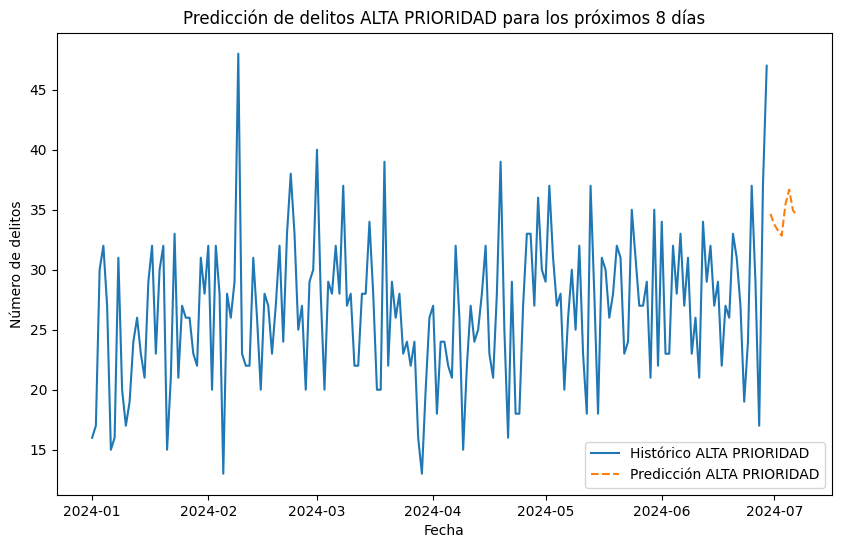

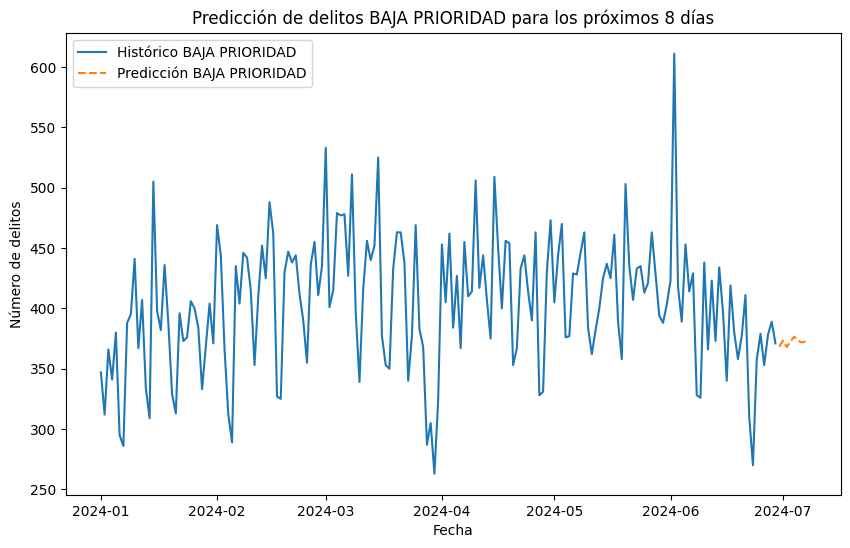

In [27]:
# Filtrar los datos para que solo muestre a partir de 2024
df_agrupado_2024 = df_agrupado[df_agrupado.index >= pd.to_datetime('2024-01-01')]

# Graficar la serie histórica y predicción para ALTA PRIORIDAD
plt.figure(figsize=(10,6))
plt.plot(df_agrupado_2024.index, df_agrupado_2024['ALTA PRIORIDAD'], label="Histórico ALTA PRIORIDAD")
plt.plot(pd.date_range(df_agrupado_2024.index[-1], periods=9, freq='D')[1:], forecast_alta, label="Predicción ALTA PRIORIDAD", linestyle='--')
plt.legend()
plt.title("Predicción de delitos ALTA PRIORIDAD para los próximos 8 días")
plt.xlabel("Fecha")
plt.ylabel("Número de delitos")
plt.show()

# Graficar la serie histórica y predicción para BAJA PRIORIDAD
plt.figure(figsize=(10,6))
plt.plot(df_agrupado_2024.index, df_agrupado_2024['BAJA PRIORIDAD'], label="Histórico BAJA PRIORIDAD")
plt.plot(pd.date_range(df_agrupado_2024.index[-1], periods=9, freq='D')[1:], forecast_baja, label="Predicción BAJA PRIORIDAD", linestyle='--')
plt.legend()
plt.title("Predicción de delitos BAJA PRIORIDAD para los próximos 8 días")
plt.xlabel("Fecha")
plt.ylabel("Número de delitos")
plt.show()